In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_2018 = pd.read_sas('gss2018.sas7bdat')
df_2022 = pd.read_sas('gss2022.sas7bdat')
# print("2018:\n", df_2018.head(10))
# print("2022:\n", df_2022.head(10))

In [5]:
# create smaller dataframe with only the stuff we need

vars = ['HAPPY'] # idk which variables we are using, but we can list them in here

df_2018 = df_2018[vars]
df_2022 = df_2022[vars]

In [6]:
# Clean Data * NOTE: i have not done anything with null vals, just checked if they exist*
## RENAME COLUMNS:
df_2018 = df_2018.rename(columns={'HAPPY': 'HAPPY_2018'})
df_2022 = df_2022.rename(columns={'HAPPY': 'HAPPY_2022'})

## TO NUMERIC:
df_2018['HAPPY_2018'] = pd.to_numeric(df_2018['HAPPY_2018'], errors='coerce')
df_2022['HAPPY_2022'] = pd.to_numeric(df_2022['HAPPY_2022'], errors='coerce')

## NULL VALUES:
null_2018 = df_2018.isnull().sum()
null_2022 = df_2022.isnull().sum()

print("\nnull count 2018: ", null_2018, "\nnull count 2022: ", null_2022)
# 2018 data has 4 null values, 2022 data has 24 null values

## OUTLIERS:
print("2018 values: \n", df_2018.value_counts())
print("2022 values: \n", df_2022.value_counts())
# no outlier values


null count 2018:  HAPPY_2018    4
dtype: int64 
null count 2022:  HAPPY_2022    24
dtype: int64
2018 values: 
 HAPPY_2018
2.0           1307
1.0            701
3.0            336
dtype: int64
2022 values: 
 HAPPY_2022
2.0           1942
3.0            799
1.0            779
dtype: int64


In [7]:
#merge the data into one data frame
df = df_2018.merge(df_2022, left_index=True, right_index=True)

print("2018 values: \n", df['HAPPY_2018'].value_counts())
print("2022 values: \n", df['HAPPY_2022'].value_counts())

2018 values: 
 2.0    1307
1.0     701
3.0     336
Name: HAPPY_2018, dtype: int64
2022 values: 
 2.0    1291
3.0     530
1.0     510
Name: HAPPY_2022, dtype: int64


In [11]:
print(df.describe())
print(df.value_counts())

        HAPPY_2018   HAPPY_2022
count  2344.000000  2331.000000
mean      1.844283     2.008580
std       0.646790     0.668041
min       1.000000     1.000000
25%       1.000000     2.000000
50%       2.000000     2.000000
75%       2.000000     2.000000
max       3.000000     3.000000
HAPPY_2018  HAPPY_2022
2.0         2.0           730
1.0         2.0           381
2.0         3.0           290
            1.0           279
3.0         2.0           178
1.0         3.0           158
            1.0           157
3.0         3.0            80
            1.0            74
dtype: int64


In [12]:
#change data frames so they contain happiness rating and year it was recorded
df18 = df_2018.rename(columns={'HAPPY_2018': 'HAPPY'})
df22 = df_2022.rename(columns={'HAPPY_2022': 'HAPPY'})

df18['YEAR'] = 2018
df22['YEAR'] = 2022

df18.head()
df22.head()

,HAPPY,YEAR
0,3.0,2022
1,3.0,2022
2,3.0,2022
3,3.0,2022
4,2.0,2022


In [14]:
#merge previous data frames together
df_merged = pd.concat([df18, df22], ignore_index=True)

# print(df_merged.head(), '\n')
# print(df_merged['HAPPY'].unique(), '\n')
# print(df_merged['YEAR'].unique(), '\n')

   HAPPY  YEAR
0    2.0  2018
1    1.0  2018
2    1.0  2018
3    1.0  2018
4    2.0  2018 

[ 2.  1.  3. nan] 

[2018 2022] 



Text(0, 0.5, 'Frequency')

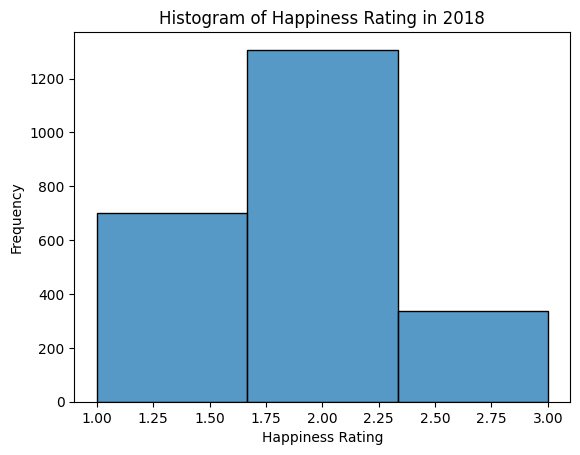

In [ ]:
# idk if this is the chart types we wanted to use, i just went with two histograms based on the values we have, but maybe a stacked barplot would also work
sns.histplot(data=df, x="HAPPY_2018", bins=3)
plt.title("Histogram of Happiness Rating in 2018") # also dk if this is an accurate title/axes names
plt.xlabel("Happiness Rating")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

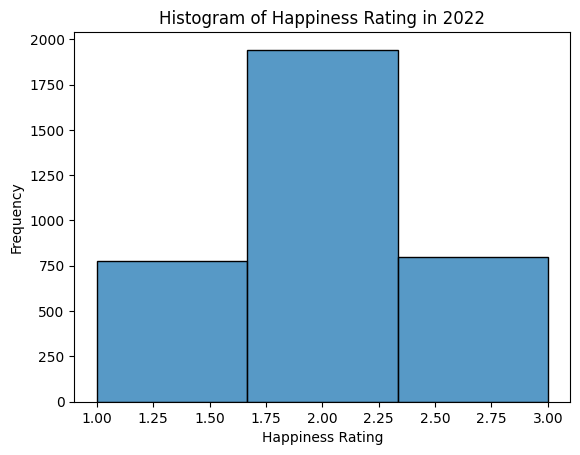

In [ ]:
sns.histplot(data=df, x="HAPPY_2022", bins=3)
plt.title("Histogram of Happiness Rating in 2022") # also dk if this is an accurate title/axes names
plt.xlabel("Happiness Rating")
plt.ylabel("Frequency")

In [ ]:
# merge dataframes from both df_mods

<Axes: ylabel='Density'>

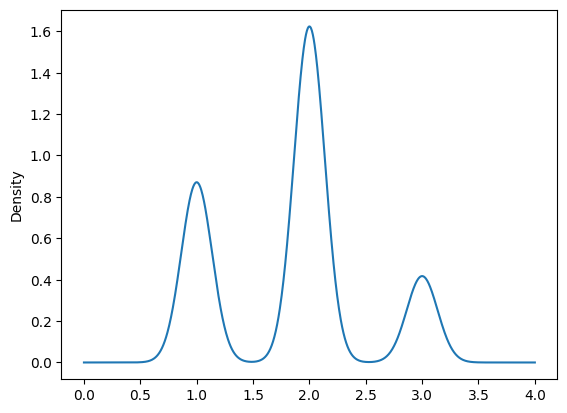

In [ ]:
# kernel density for 2018

df['HAPPY_2018'].plot.density()

<Axes: ylabel='Density'>

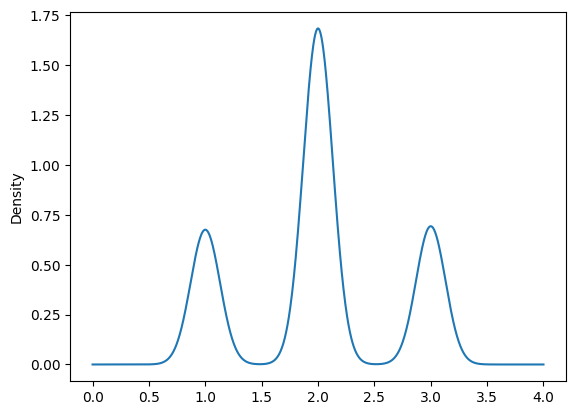

In [ ]:
#and 2022

df['HAPPY_2022'].plot.density()

#will do the grouped ones when we merge the dataset

<Axes: ylabel='Density'>

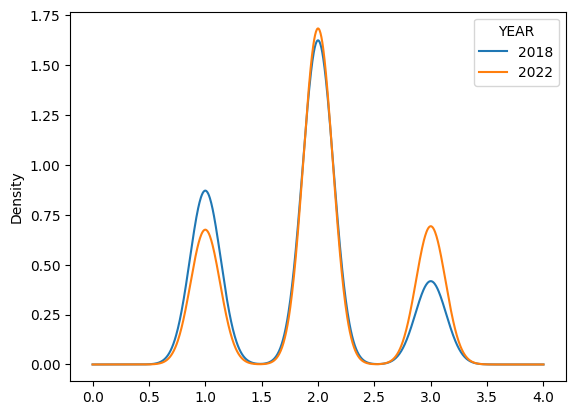

In [ ]:
#grouped kernel,  grouped by year
group_by = 'YEAR'
var = 'HAPPY'
df_wide = df_merged.pivot(columns=group_by,values=var)
df_wide.plot.density()

In [16]:
# change variables to categorical for cleaner visualizations
# using merged dataset

df_merged['HAPPY'] = df_merged['HAPPY'].replace(1.0,'Very Happy')
df_merged['HAPPY'] = df_merged['HAPPY'].replace(2.0,'Somewhat Happy')
df_merged['HAPPY'] = df_merged['HAPPY'].replace(3.0,'Not Happy')
df_merged.head()

,HAPPY,YEAR
0,Somewhat Happy,2018
1,Very Happy,2018
2,Very Happy,2018
3,Very Happy,2018
4,Somewhat Happy,2018


<Axes: xlabel='HAPPY', ylabel='count'>

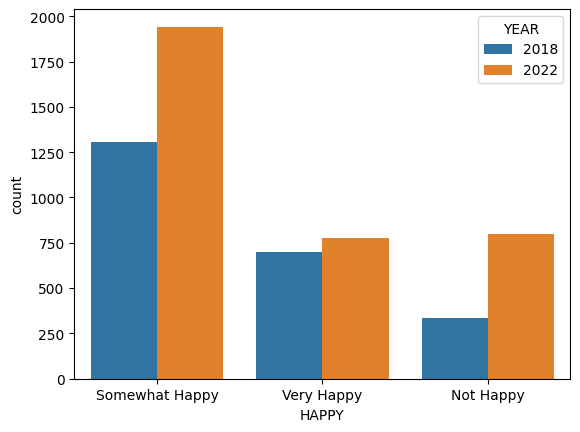

In [21]:
# plot of merged happiness side by side
sns.countplot(data=df_merged, x='HAPPY', hue='YEAR')